In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [10]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 495.5 kB/s eta 0:03:22
   ---------------------------------------- 0.1/99.7 MB 508.4 kB/s eta 0:03:17
   ---------------------------------------- 0.1/99.7 MB 525.1 kB/s eta 0:03:10
   ---------------------------------------- 0.1/99.7 MB 467.6 kB/s eta 0:03:34
   ---------------------------------------- 0.1/99.7 MB 467.6 kB/s eta 0:03:34
   ---------------------------------------- 0.1/99.7 MB 467.6 kB/s eta 0:03:34
   ----------------------------------

In [11]:
from xgboost import XGBRegressor

In [13]:
boston=pd.read_csv("C:\\Users\\anujr\\OneDrive\\Documents\\data analyst\\ml raw data files\\boston.csv")

In [14]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
boston=boston.rename(columns={"MEDV":"Price"})

In [23]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
boston.shape

(506, 14)

In [25]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [26]:
boston.duplicated().sum()

0

In [27]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<Axes: >

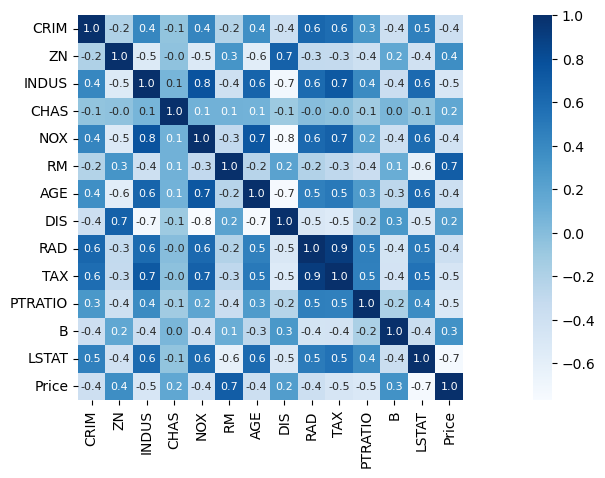

In [33]:
# Now checking correlation between various columns
plt.figure(figsize=(18,5))
sns.heatmap(boston.corr(),cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues")

In [34]:
# Splting the data and labels
X=boston.drop(["Price"],axis=1)
Y=boston["Price"]

In [37]:
# Train  and test the data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
print(X.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


In [39]:
# CReate model xgboost
#XGBRegressor

In [40]:
model=XGBRegressor()

In [41]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
# Evaluation
# Prediction


In [43]:
# accuracy check

In [50]:
train_acc=model.predict(x_train)


In [51]:
train_acc

array([23.112196 , 20.992601 , 20.10438  , 34.67932  , 13.920501 ,
       13.499354 , 21.998383 , 15.206723 , 10.89543  , 22.67402  ,
       13.795236 ,  5.602332 , 29.808502 , 49.98666  , 34.89634  ,
       20.594336 , 23.388903 , 19.2118   , 32.69294  , 19.604128 ,
       26.978151 ,  8.405952 , 46.00062  , 21.70406  , 27.084402 ,
       19.372278 , 19.297894 , 24.79984  , 22.608278 , 31.707775 ,
       18.53683  ,  8.703393 , 17.40025  , 23.698814 , 13.29729  ,
       10.504759 , 12.693588 , 24.994888 , 19.694864 , 14.911037 ,
       24.20254  , 24.991112 , 14.901547 , 16.987965 , 15.592753 ,
       12.704759 , 24.505623 , 15.007718 , 49.999355 , 17.509344 ,
       21.18844  , 31.999287 , 15.606071 , 22.902134 , 19.309835 ,
       18.697083 , 23.302961 , 37.19767  , 30.102247 , 33.117855 ,
       20.993683 , 50.00471  , 13.40048  ,  5.002565 , 16.50862  ,
        8.4016905, 28.651423 , 19.49218  , 20.595366 , 45.404697 ,
       39.808857 , 33.4055   , 19.81498  , 33.406376 , 25.3020

In [52]:
r2_score(train_acc,y_train)

0.9999980033283415

In [54]:
mse=mean_squared_error(train_acc,y_train)

In [55]:
mse

0.00016880599071692853

In [57]:
np.sqrt(mse) # Root mean squared error

0.012992535961733127

In [58]:
test_acc=model.predict(x_test)

In [59]:
test_acc

array([22.007828 , 21.22598  , 30.466019 , 27.735027 ,  9.134951 ,
       12.740403 , 25.738058 , 27.750889 , 25.364376 , 20.229292 ,
       27.821787 , 24.7761   , 19.771252 , 20.497349 , 12.970438 ,
       22.86288  , 19.605635 , 10.677987 ,  8.277654 , 15.529657 ,
       22.842052 , 20.002996 , 34.06762  , 18.943192 , 15.624948 ,
       18.787666 , 46.0246   , 33.05114  , 34.804283 , 19.070232 ,
       17.53711  , 20.27066  , 31.102339 , 24.026129 , 12.199101 ,
       18.224184 , 10.182956 , 21.252314 , 22.891352 , 21.458113 ,
       26.451164 , 12.1898775, 27.141438 ,  8.322471 , 21.356699 ,
       12.768549 , 35.221687 , 14.574406 , 32.06173  , 15.088605 ,
       31.076805 , 26.808199 ,  6.1558666, 34.42615  , 25.135347 ,
       19.508772 , 19.424906 , 19.58183  , 16.680052 , 22.962534 ,
       20.904106 , 21.24     , 18.46788  , 29.243906 , 33.434864 ,
       26.021257 , 49.91979  , 25.905489 ,  9.713634 , 24.058743 ,
       16.63922  ,  9.0341625, 13.197622 , 18.80479  , 26.9856

In [60]:
r2_score(test_acc,y_test)

0.8981202947242624

In [61]:
mean_squared_error(test_acc,y_test)

7.9332706911154185

In [62]:
# Prediction check

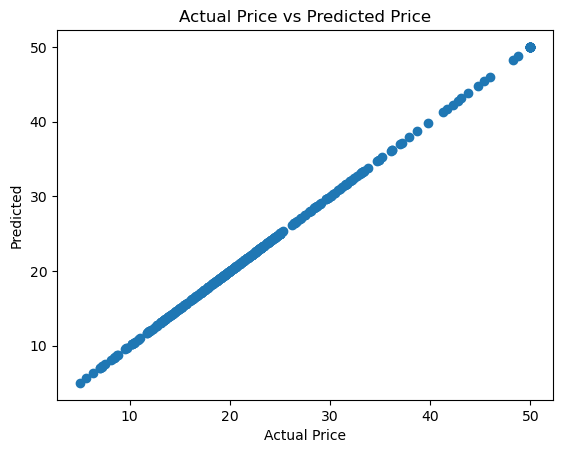

In [63]:
plt.scatter(y_train,train_acc)
plt.xlabel("Actual Price")
plt.ylabel("Predicted")
plt.title("Actual Price vs Predicted Price")
plt.show()

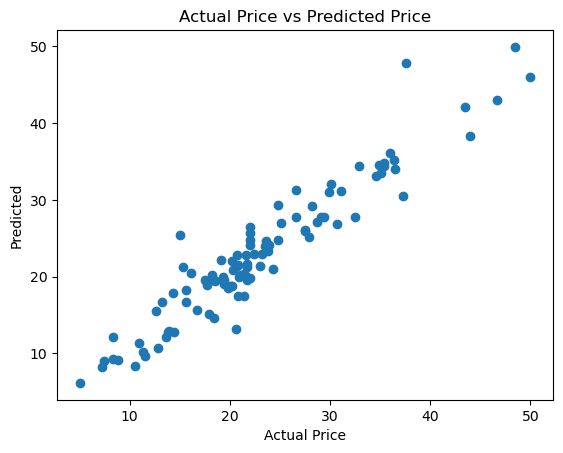

In [64]:
plt.scatter(y_test,test_acc)
plt.xlabel("Actual Price")
plt.ylabel("Predicted")
plt.title("Actual Price vs Predicted Price")
plt.show()